# NAME: Perfect Potakey 

# INDEX NUMBER: 4295220

In [148]:
#Importing libraries

import xarray as xr
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from cartopy import crs, feature
import cartopy.crs as ccrs
import numpy as np
import matplotlib.colors as mcolors

In [149]:
# opening multiple netcdf files at once 
# viewing variables of the files 
ds_ws=xr.open_dataset('ALL_WESTERN_SAHARA.nc', engine='netcdf4')
ds_ws=ds_ws.where(ds_ws !=-99)
ds_ws

<xarray.Dataset>
Dimensions:   (datetime: 3652, lat: 29, lon: 36)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2010-01-01 2010-01-02 ... 2019-12-31
  * lon       (lon) float32 -17.25 -17.0 -16.75 -16.5 ... -9.25 -9.0 -8.75 -8.5
  * lat       (lat) float32 28.0 27.75 27.5 27.25 27.0 ... 21.75 21.5 21.25 21.0
Data variables:
    crs       float64 1.0
    precip    (datetime, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Apr 27 09:54:07 2023: cdo mergetime, PERSIANN_Western_S...
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...

In [150]:
# data variable
precipitation = ds_ws['precip']

# selecting a point data
da_ws=precipitation.sel(lon=-12.8858, lat=24.215527, method='nearest')

# select datetime for project
datetime= da_ws.sel(datetime=slice('2010','2019'))

# 1. COMPUTING THE MONTHLY RAINFALL TOTALS AND THEIR CLIMATOLOGIES FOR EACH MONTH

In [151]:
#Computing the monthly rainfall totals

In [152]:
monthly_totals = datetime.resample(datetime='1M').sum('datetime')
monthly_totals.to_series().reset_index()

,datetime,precip
0,2010-01-31,6.460000
1,2010-02-28,14.309999
2,2010-03-31,0.490000
3,2010-04-30,6.120000
4,2010-05-31,0.180000
...,...,...
115,2019-08-31,9.960000
116,2019-09-30,4.760000
117,2019-10-31,9.840000
118,2019-11-30,0.600000


In [153]:
# Computing their longterm climatologies

In [154]:
monthly_climatology = monthly_totals.groupby('datetime.month').mean('datetime')
monthly_climatology.to_series().reset_index()

,month,precip
0,1,7.028000
1,2,8.467000
2,3,4.726000
3,4,9.226000
4,5,2.913000
5,6,1.011000
6,7,1.129000
7,8,18.820000
8,9,25.991001
9,10,16.807999


# 2. COMPUTING THE ANNUAL TOTALS AND AVERAGE ACROSS WSETERN SAHARA TO PRODUCE TIMESRIES ON THE YEAR-TO-YEAR CHANGES AND TRENDS

In [155]:
#Computing the annual totals

In [156]:
annual_totals = datetime.groupby('datetime.year').sum()
annual_totals.to_series().reset_index()

,year,precip
0,2010,125.290009
1,2011,86.860001
2,2012,108.440002
3,2013,62.030003
4,2014,88.010002
5,2015,270.750031
6,2016,171.019989
7,2017,89.580002
8,2018,122.380005
9,2019,42.340000


In [157]:
year = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

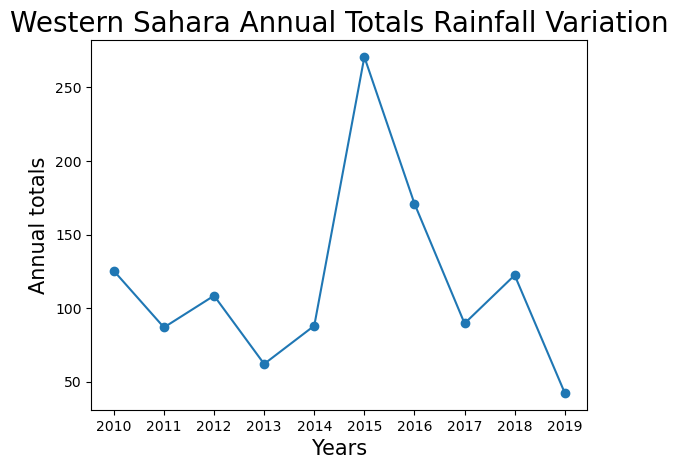

In [158]:
# Plotting the timeseries for annual totals


plt.plot(year, annual_totals, marker ='o')
plt.xlabel('Years', fontsize = 15)
plt.ylabel('Annual totals', fontsize = 15)
plt.title('Western Sahara Annual Totals Rainfall Variation', fontsize = 20);
plt.savefig('1.png')
plt.show()

In [159]:
#Computing annual average

In [160]:
annual_average = datetime.groupby('datetime.year').mean('datetime')
annual_average.to_series().reset_index()

,year,precip
0,2010,0.343260
1,2011,0.237973
2,2012,0.296284
3,2013,0.169945
4,2014,0.241123
5,2015,0.741781
6,2016,0.467268
7,2017,0.245425
8,2018,0.335288
9,2019,0.116000


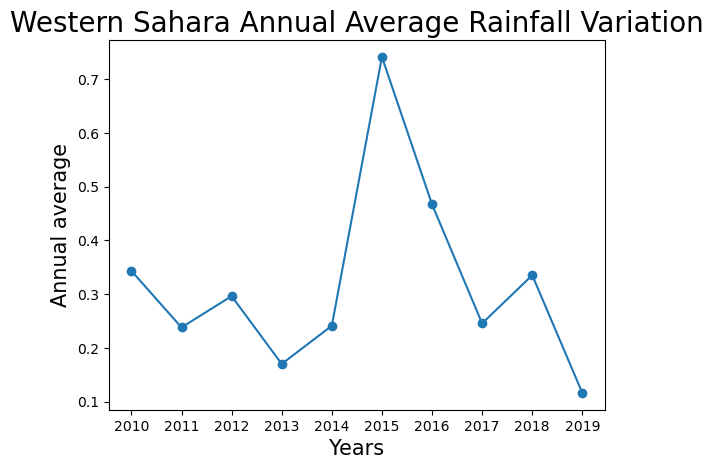

In [161]:
#Plotting the annual average timeseries


plt.plot(year, annual_average, marker ='o')
plt.xlabel('Years', fontsize = 15)
plt.ylabel('Annual average', fontsize = 15)
plt.title('Western Sahara Annual Average Rainfall Variation', fontsize = 20);
plt.savefig('2.png')
plt.show()

# 3. COMPUTING THE NUMBER OF DRY AND WET DAYS PER MONTH AND PER YEAR TO PRODUCE SPATIAL PLOTS AND TIMESERIES

# PRODUCING THE SPATIAL PLOTS PER MONTH AND PER YEAR

In [162]:
# COMPUTING THE NUMBER FOR WET (RR>=1mm) AND DRY(RR<1) 

wet_days = precipitation.where(precipitation >= 1)
dry_days = precipitation.where(precipitation < 1)

# per month
wet_days_per_month = wet_days.groupby('datetime.month').count(dim='datetime')
dry_days_per_month = dry_days.groupby('datetime.month').count(dim='datetime')


# per year
wet_days_per_year = wet_days.resample(datetime='1Y').count(dim='datetime')
dry_days_per_year = dry_days.resample(datetime='1Y').count(dim='datetime')

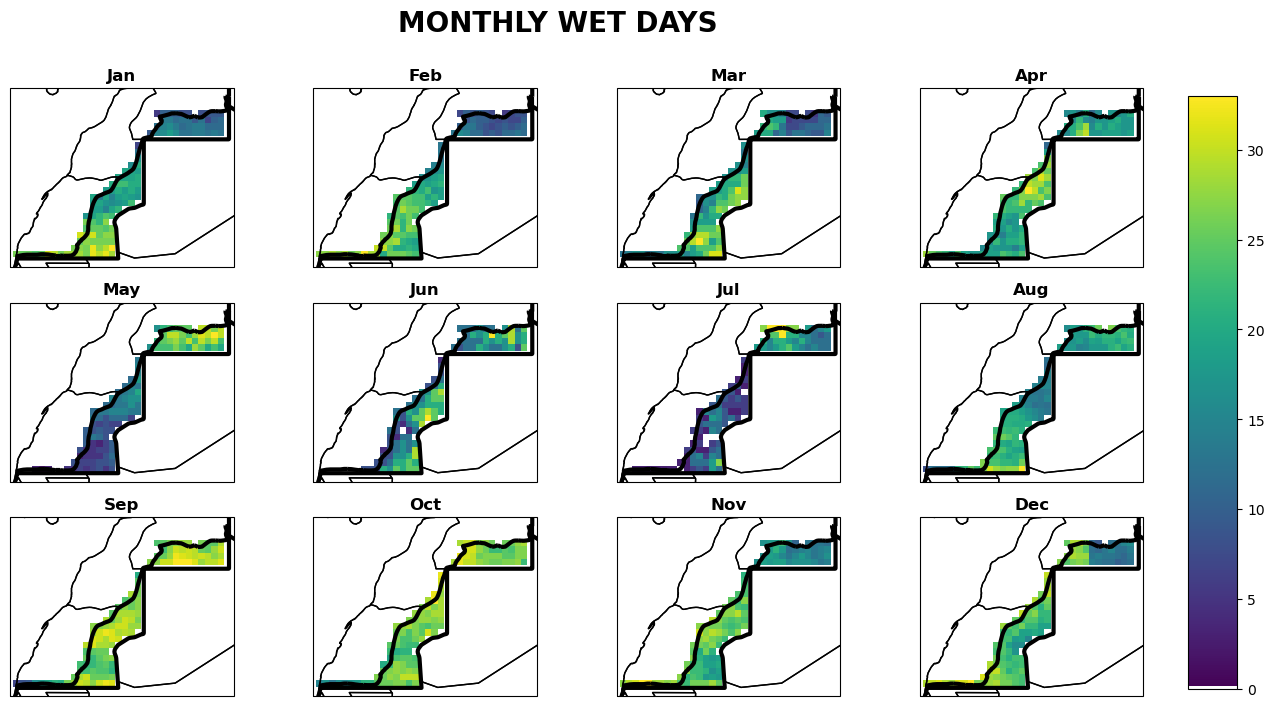

In [163]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 7.9), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     # add features
    ax[i].add_feature(feature.LAND)
    ax[i].add_feature(feature.BORDERS, linewidth=3)
    ax[i].add_feature(feature.STATES)
    ax[i].coastlines(resolution='50m')
    ax[i].set_title(month[i], fontweight='bold')
    
    ax[i].set_extent ([-17.25,-8.5,28,21])
    
    cmap = plt.get_cmap('viridis')
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('viridis', colors)
    
    cs = ax[i].pcolormesh(wet_days_per_month['lon'], wet_days_per_month['lat'], wet_days_per_month[i], cmap=new_map)


# colorbar
cbar = fig.add_axes([0.92, 0.12, 0.033, 0.75]) #lbwh
fig.colorbar(cs, cax=cbar ,orientation='vertical')

fig.suptitle('MONTHLY WET DAYS', fontweight='bold', fontsize=20)
plt.savefig('3.png')

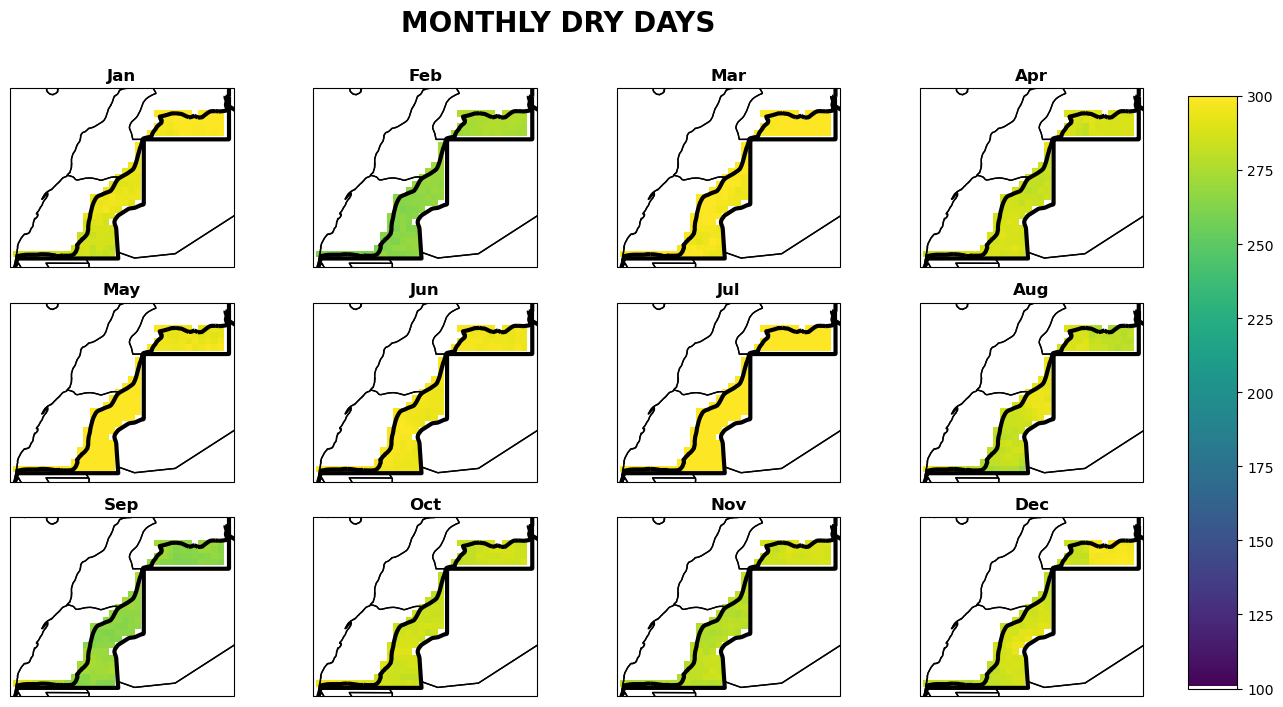

In [164]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 7.9), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     # add features
    ax[i].add_feature(feature.LAND)
    ax[i].add_feature(feature.BORDERS, linewidth=3)
    ax[i].add_feature(feature.STATES)
    ax[i].coastlines(resolution='50m')
    ax[i].set_title(month[i], fontweight='bold')
    
    ax[i].set_extent ([-17.25,-8.5,28,21])
    
    cmap = plt.get_cmap('viridis')
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('viridis', colors)
    
    cs = ax[i].pcolormesh(dry_days_per_month['lon'], dry_days_per_month['lat'], dry_days_per_month[i], cmap=new_map, vmax=300,vmin=100)


# colorbar
cbar = fig.add_axes([0.92, 0.12, 0.033, 0.75]) #lbwh
fig.colorbar(cs, cax=cbar ,orientation='vertical')

fig.suptitle('MONTHLY DRY DAYS', fontweight='bold', fontsize=20)
plt.savefig('4.png')

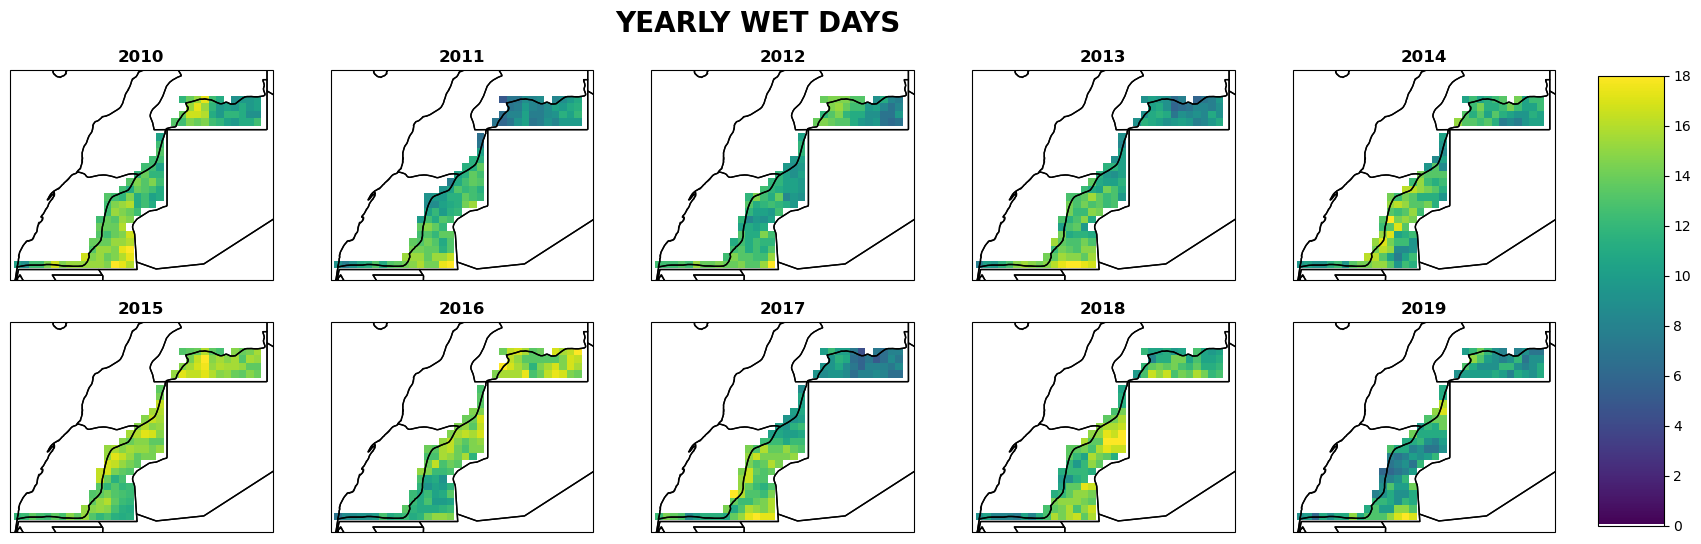

In [165]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     # add features
    ax[i].add_feature(feature.LAND)
    # ax[i].add_feature(feature.BORDERS, linewidth=3)
    ax[i].add_feature(feature.STATES)
    ax[i].coastlines(resolution='50m')
    ax[i].set_title(year[i], fontweight='bold')
    
    ax[i].set_extent ([-17.25,-8.5,28,21])
    
    cmap = plt.get_cmap('viridis')
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('viridis', colors)
    
    cs = ax[i].pcolormesh(wet_days_per_year['lon'], wet_days_per_year['lat'], wet_days_per_year[i], cmap=new_map)


# colorbar
cbar = fig.add_axes([0.92, 0.12, 0.033, 0.75]) #lbwh
fig.colorbar(cs, cax=cbar ,orientation='vertical')

fig.suptitle('YEARLY WET DAYS', fontweight='bold', fontsize=20)
plt.savefig('5.png')

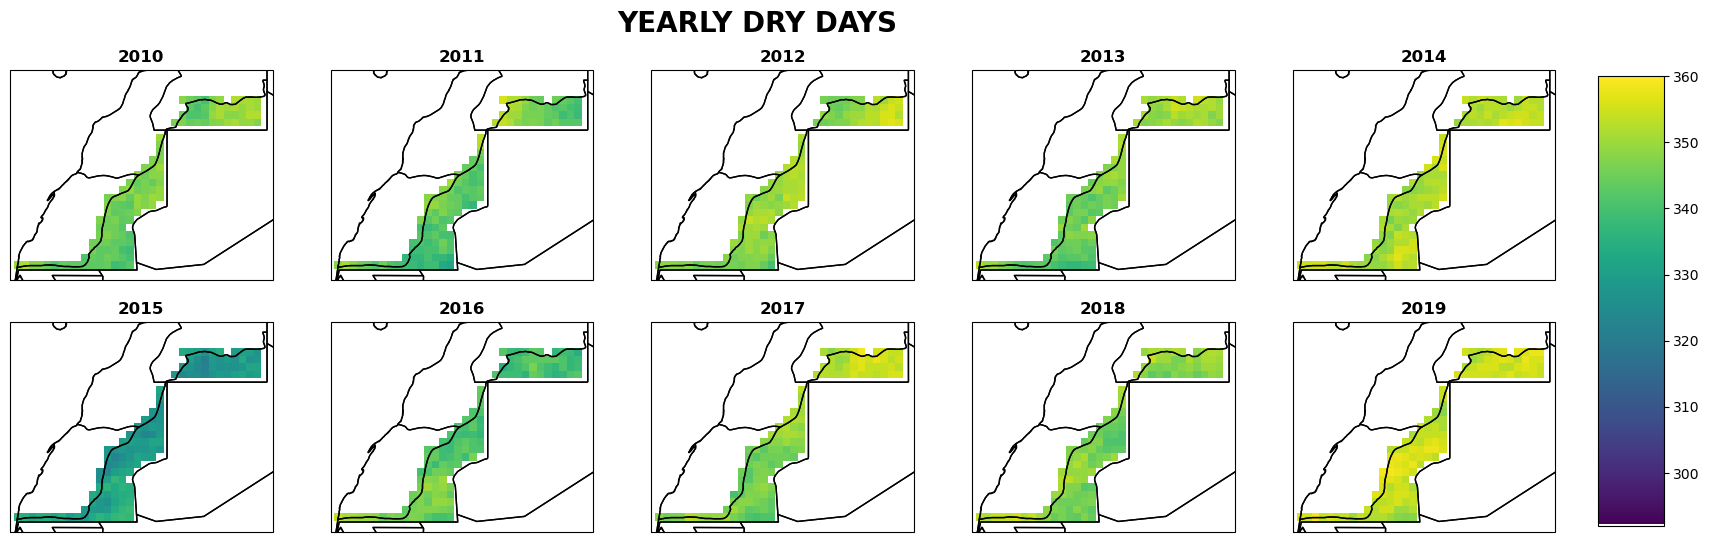

In [166]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     # add features
    ax[i].add_feature(feature.LAND)
    # ax[i].add_feature(feature.BORDERS, linewidth=3)
    ax[i].add_feature(feature.STATES)
    ax[i].coastlines(resolution='50m')
    ax[i].set_title(year[i], fontweight='bold')
    
    ax[i].set_extent ([-17.25,-8.5,28,21])
    
    cmap = plt.get_cmap('viridis')
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('viridis', colors)
    
    cs = ax[i].pcolormesh(dry_days_per_year['lon'], dry_days_per_year['lat'], dry_days_per_year[i], cmap=new_map,vmax=360,vmin=292)


# colorbar
cbar = fig.add_axes([0.92, 0.12, 0.033, 0.75]) #lbwh
fig.colorbar(cs, cax=cbar ,orientation='vertical')

fig.suptitle('YEARLY DRY DAYS', fontweight='bold', fontsize=20)
plt.savefig('6.png')

# PRODUCING THE TIMESERIES

In [167]:
#wet_days = precipitation.where(precipitation >= 1)
#dry_days = precipitation.where(precipitation < 1)
wet_days = da_ws.where(da_ws >= 1)
dry_days = da_ws.where(da_ws < 1)

# per month
wet_days_per_month = wet_days.groupby('datetime.month').count(dim='datetime')
dry_days_per_month = dry_days.groupby('datetime.month').count(dim='datetime')


# per year
wet_days_per_year = wet_days.resample(datetime='1Y').count(dim='datetime')
dry_days_per_year = dry_days.resample(datetime='1Y').count(dim='datetime')

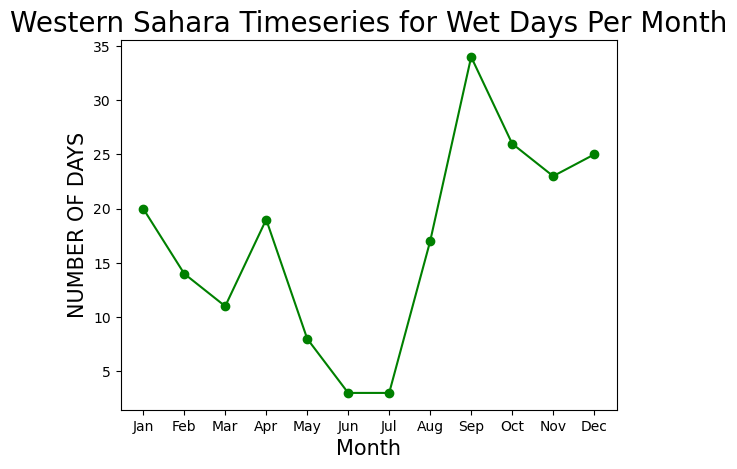

In [168]:
plt.plot(month, wet_days_per_month, marker ='o',color = 'g')
plt.xlabel('Month', fontsize = 15)
plt.ylabel('NUMBER OF DAYS', fontsize = 15)
plt.title('Western Sahara Timeseries for Wet Days Per Month', fontsize = 20);
plt.savefig('7.png')
plt.show()

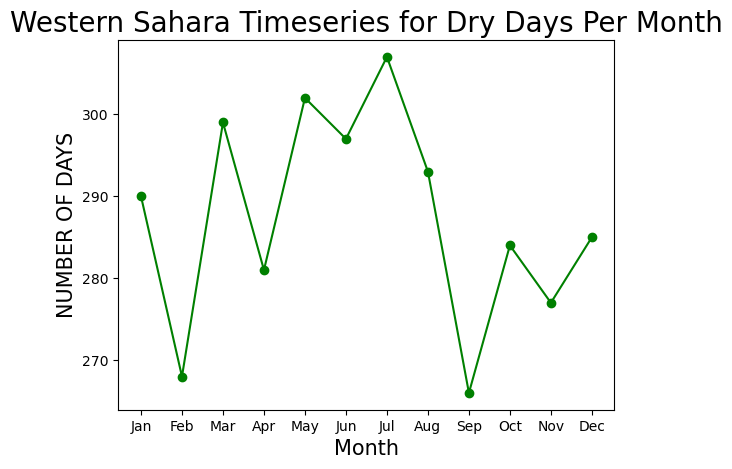

In [174]:
plt.plot(month, dry_days_per_month, marker ='o',color = 'g')
plt.xlabel('Month', fontsize = 15)
plt.ylabel('NUMBER OF DAYS', fontsize = 15)
plt.title('Western Sahara Timeseries for Dry Days Per Month', fontsize = 20);
plt.savefig('8.png')
plt.show()

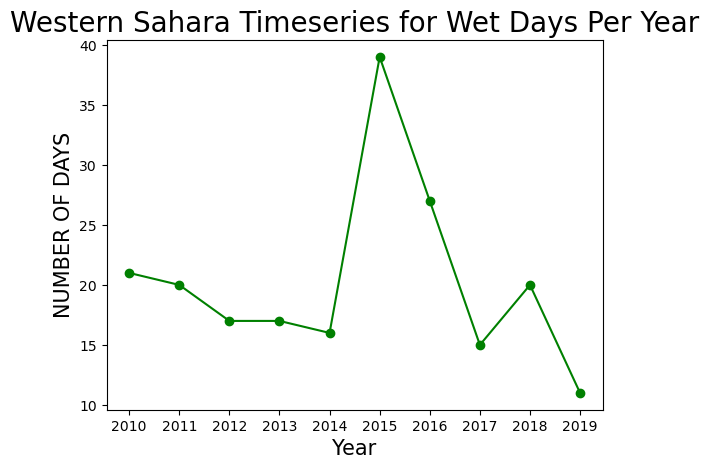

In [175]:
plt.plot(year, wet_days_per_year, marker ='o',color = 'g')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('NUMBER OF DAYS', fontsize = 15)
plt.title('Western Sahara Timeseries for Wet Days Per Year', fontsize = 20);
plt.savefig('9.png')
plt.show()

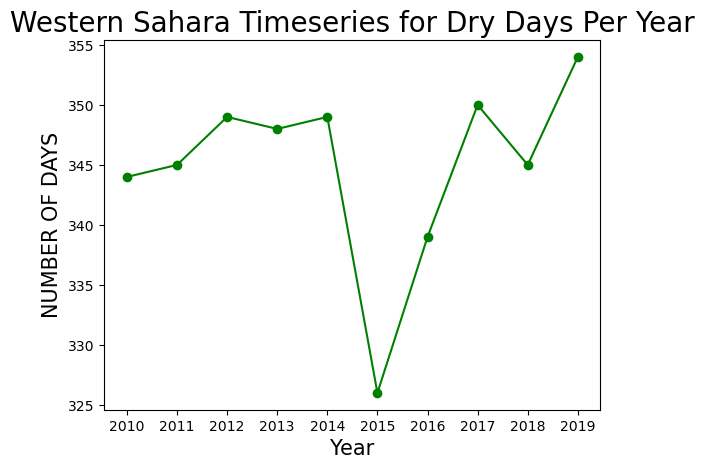

In [176]:
plt.plot(year, dry_days_per_year, marker ='o',color = 'g')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('NUMBER OF DAYS', fontsize = 15)
plt.title('Western Sahara Timeseries for Dry Days Per Year', fontsize = 20);
plt.savefig('10.png')
plt.show()

# 4. COMPUTING THE NUMBER OF EXTREME RAINFALL DAYS FOR RR>10mm;RR>20mm PER MONTH AND PER YEAR

In [177]:
extreme_wet_days1 = precipitation.where(precipitation > 10)
extreme_wet_days2 = precipitation.where(precipitation > 20)

# per month
extreme_wet_days1_per_month = extreme_wet_days1.groupby('datetime.month').count(dim='datetime')
extreme_wet_days2_per_month = extreme_wet_days2.groupby('datetime.month').count(dim='datetime')


# per year
extreme_wet_days1_per_year = extreme_wet_days1.resample(datetime='1Y').count(dim='datetime')
extreme_wet_days2_per_year = extreme_wet_days2.resample(datetime='1Y').count(dim='datetime')

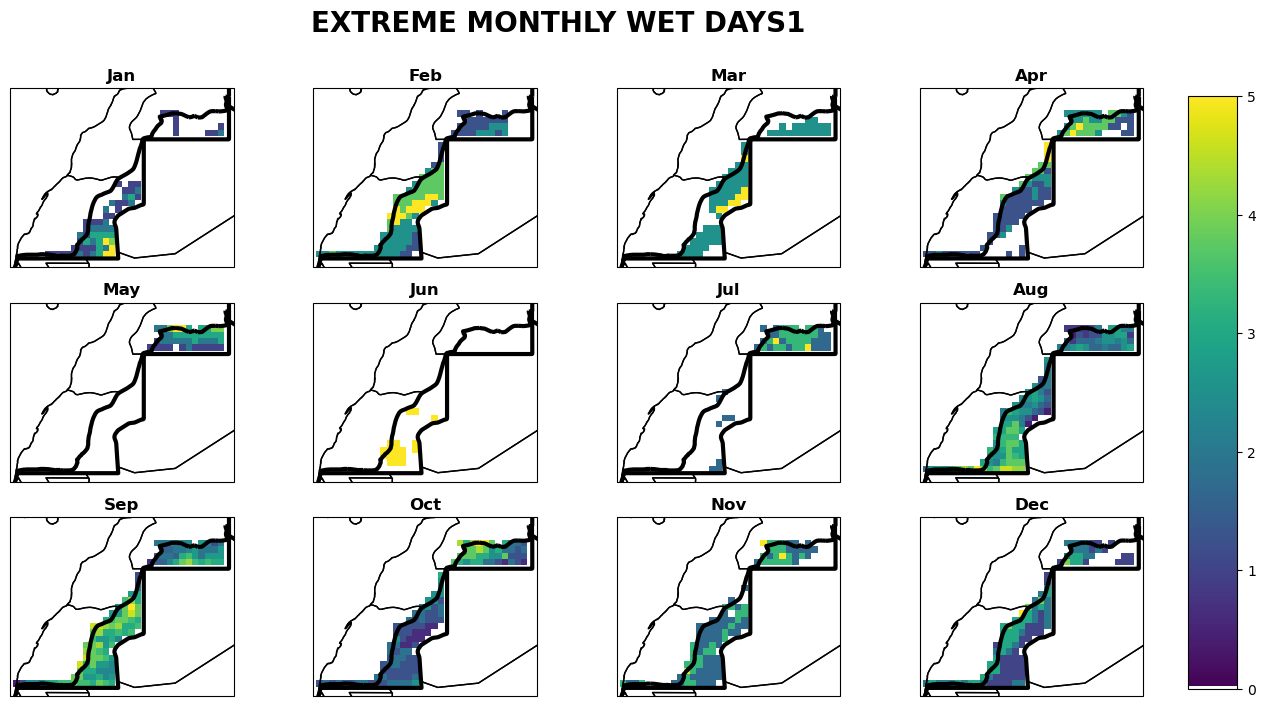

In [178]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 7.9), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     # add features
    ax[i].add_feature(feature.LAND)
    ax[i].add_feature(feature.BORDERS, linewidth=3)
    ax[i].add_feature(feature.STATES)
    ax[i].coastlines(resolution='50m')
    ax[i].set_title(month[i], fontweight='bold')
    
    ax[i].set_extent ([-17.25,-8.5,28,21])
    
    cmap = plt.get_cmap('viridis')
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('viridis', colors)
    
    cs = ax[i].pcolormesh(extreme_wet_days1_per_month['lon'], extreme_wet_days1_per_month['lat'], extreme_wet_days1_per_month[i], cmap=new_map)


# colorbar
cbar = fig.add_axes([0.92, 0.12, 0.033, 0.75]) #lbwh
fig.colorbar(cs, cax=cbar ,orientation='vertical')

fig.suptitle('EXTREME MONTHLY WET DAYS1', fontweight='bold', fontsize=20)
plt.savefig('11.png')

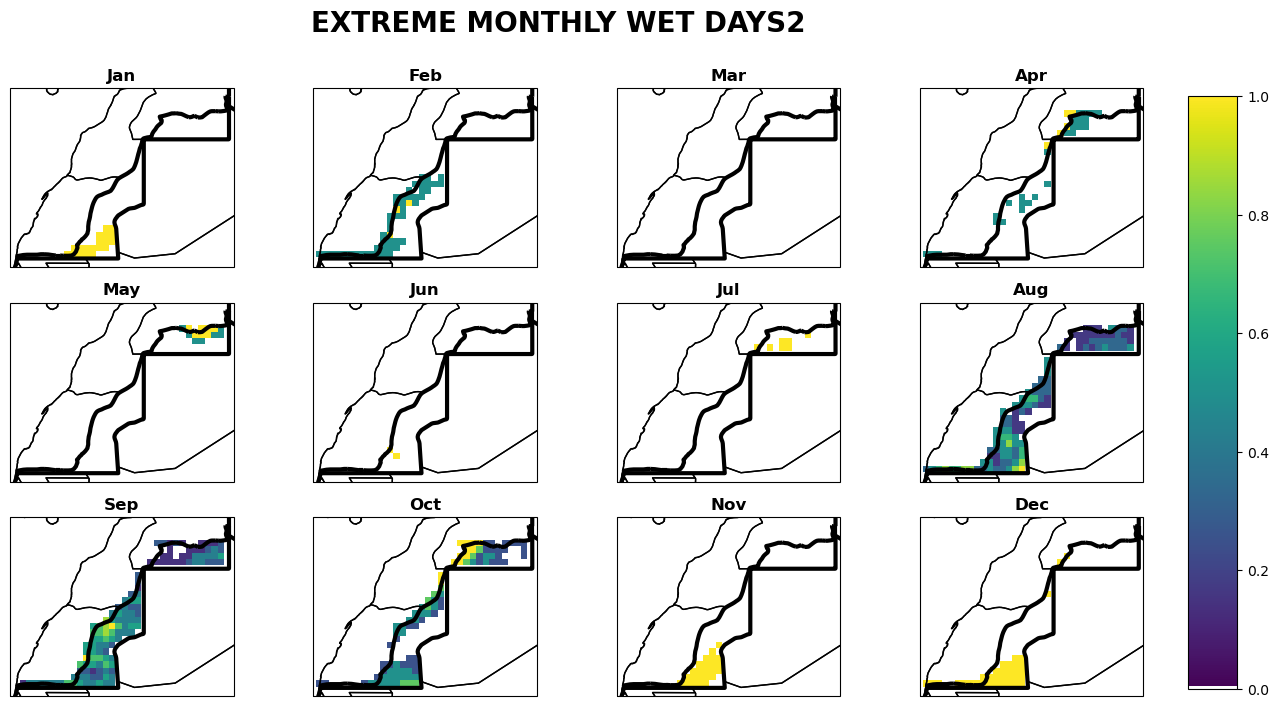

In [179]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 7.9), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     # add features
    ax[i].add_feature(feature.LAND)
    ax[i].add_feature(feature.BORDERS, linewidth=3)
    ax[i].add_feature(feature.STATES)
    ax[i].coastlines(resolution='50m')
    ax[i].set_title(month[i], fontweight='bold')
    
    ax[i].set_extent ([-17.25,-8.5,28,21])
    
    cmap = plt.get_cmap('viridis')
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('viridis', colors)
    
    cs = ax[i].pcolormesh(extreme_wet_days2_per_month['lon'], extreme_wet_days2_per_month['lat'], extreme_wet_days2_per_month[i], cmap=new_map)


# colorbar
cbar = fig.add_axes([0.92, 0.12, 0.033, 0.75]) #lbwh
fig.colorbar(cs, cax=cbar ,orientation='vertical')

fig.suptitle('EXTREME MONTHLY WET DAYS2', fontweight='bold', fontsize=20)
plt.savefig('12.png')

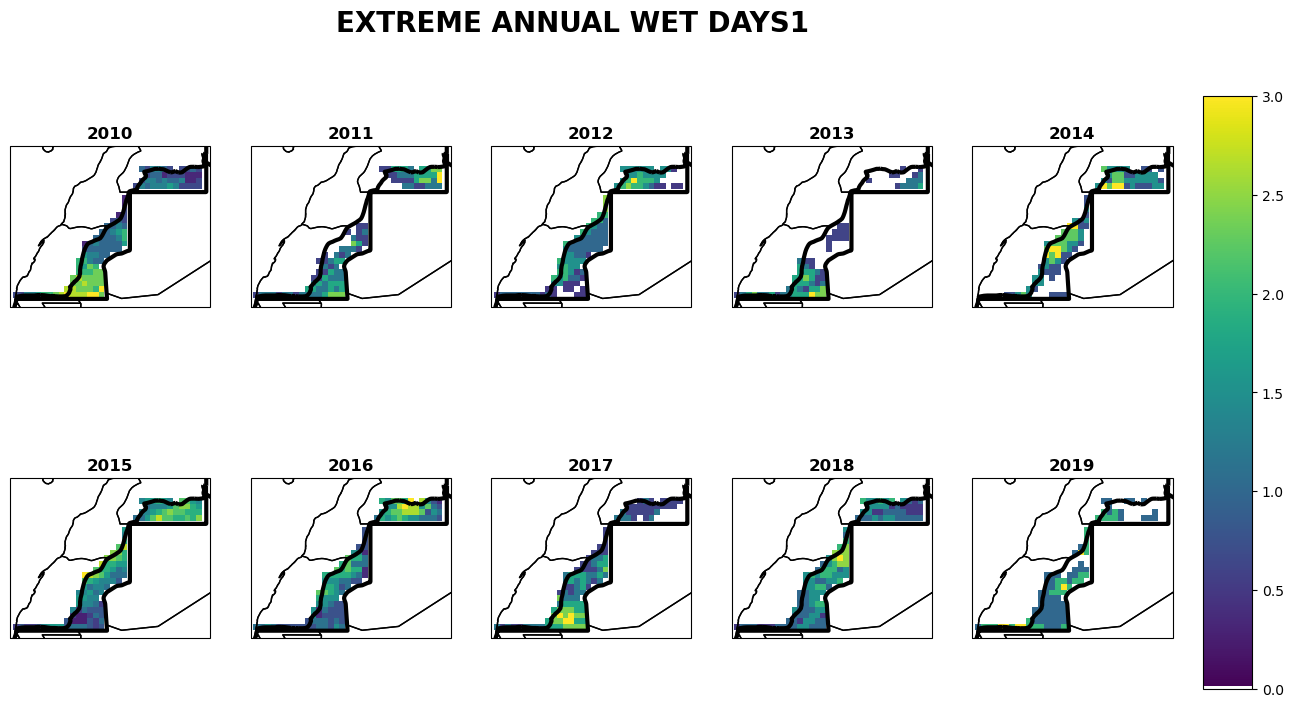

In [180]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7.9), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     # add features
    ax[i].add_feature(feature.LAND)
    ax[i].add_feature(feature.BORDERS, linewidth=3)
    ax[i].add_feature(feature.STATES)
    ax[i].coastlines(resolution='50m')
    ax[i].set_title(year[i], fontweight='bold')
    
    ax[i].set_extent ([-17.25,-8.5,28,21])
    
    cmap = plt.get_cmap('viridis')
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('viridis', colors)
    
    cs = ax[i].pcolormesh(extreme_wet_days1_per_year['lon'], extreme_wet_days1_per_year['lat'], extreme_wet_days1_per_year[i], cmap=new_map)


# colorbar
cbar = fig.add_axes([0.92, 0.12, 0.033, 0.75]) #lbwh
fig.colorbar(cs, cax=cbar ,orientation='vertical')

fig.suptitle('EXTREME ANNUAL WET DAYS1', fontweight='bold', fontsize=20)
plt.savefig('13.png')

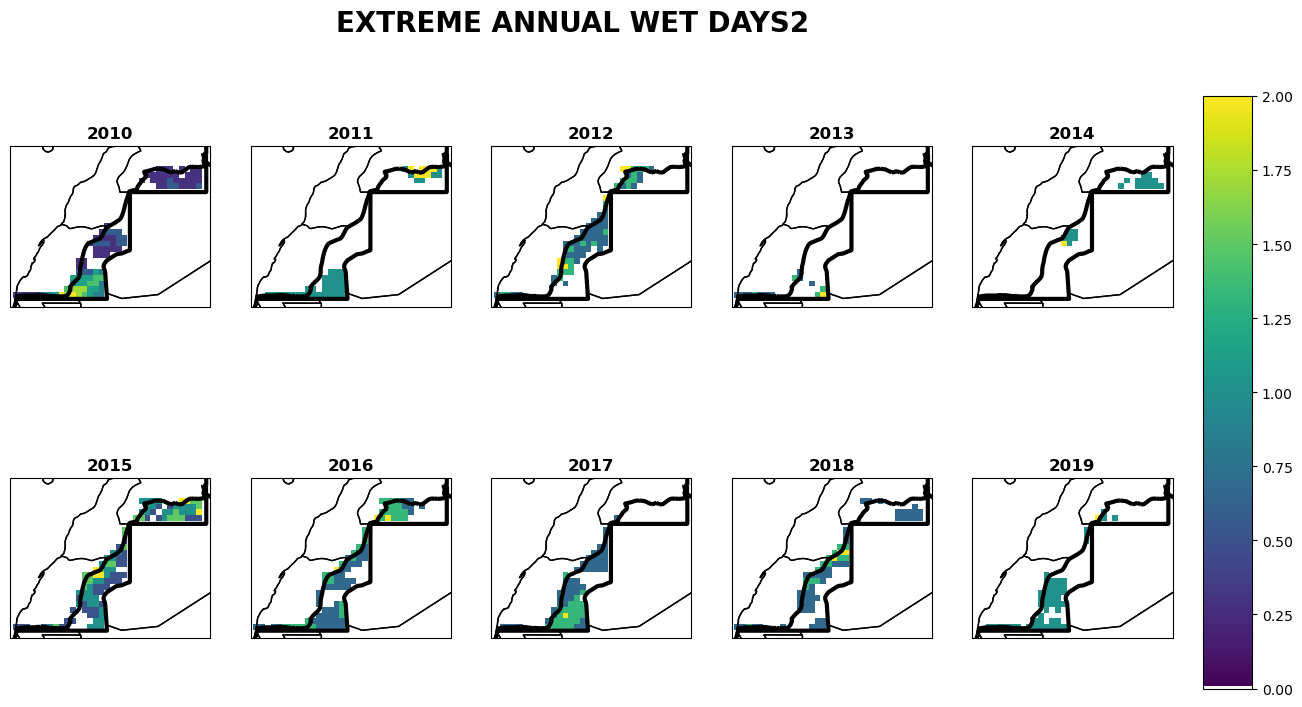

In [181]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7.9), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     # add features
    ax[i].add_feature(feature.LAND)
    ax[i].add_feature(feature.BORDERS, linewidth=3)
    ax[i].add_feature(feature.STATES)
    ax[i].coastlines(resolution='50m')
    ax[i].set_title(year[i], fontweight='bold')
    
    ax[i].set_extent ([-17.25,-8.5,28,21])
    
    cmap = plt.get_cmap('viridis')
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('viridis', colors)
    
    cs = ax[i].pcolormesh(extreme_wet_days2_per_year['lon'], extreme_wet_days2_per_year['lat'], extreme_wet_days2_per_year[i], cmap=new_map)


# colorbar
cbar = fig.add_axes([0.92, 0.12, 0.033, 0.75]) #lbwh
fig.colorbar(cs, cax=cbar ,orientation='vertical')

fig.suptitle('EXTREME ANNUAL WET DAYS2', fontweight='bold', fontsize=20)
plt.savefig('14.png')

In [182]:
extreme_wet_days1 = da_ws.where(da_ws > 10)
extreme_wet_days2 = da_ws.where(da_ws > 20)

# per month
extreme_wet_days1_per_month = extreme_wet_days1.groupby('datetime.month').count(dim='datetime')
extreme_wet_days2_per_month = extreme_wet_days2.groupby('datetime.month').count(dim='datetime')


# per year
extreme_wet_days1_per_year = extreme_wet_days1.resample(datetime='1Y').count(dim='datetime')
extreme_wet_days2_per_year = extreme_wet_days2.resample(datetime='1Y').count(dim='datetime')

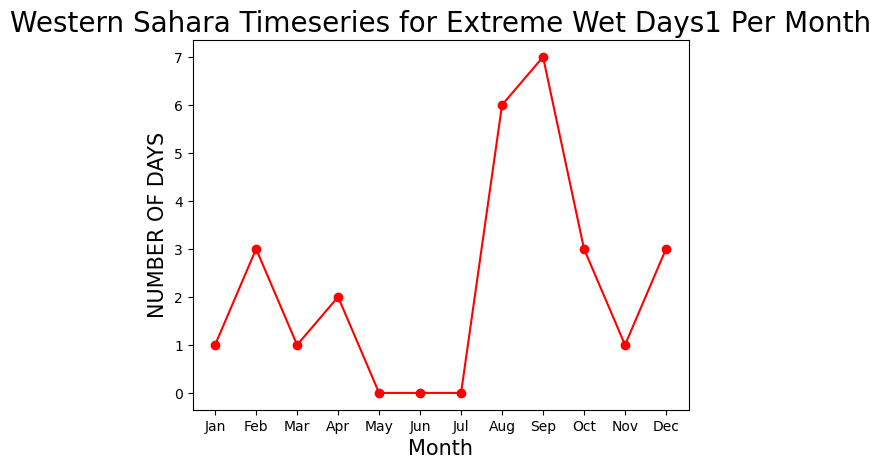

In [183]:
plt.plot(month, extreme_wet_days1_per_month, marker ='o',color = 'r')
plt.xlabel('Month', fontsize = 15)
plt.ylabel('NUMBER OF DAYS', fontsize = 15)
plt.title('Western Sahara Timeseries for Extreme Wet Days1 Per Month', fontsize = 20);
plt.savefig('15.png')
plt.show()

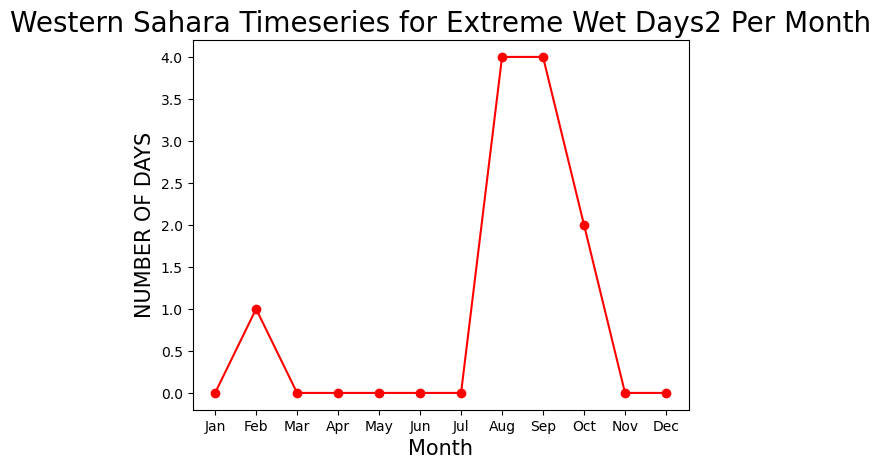

In [184]:
plt.plot(month, extreme_wet_days2_per_month, marker ='o',color = 'r')
plt.xlabel('Month', fontsize = 15)
plt.ylabel('NUMBER OF DAYS', fontsize = 15)
plt.title('Western Sahara Timeseries for Extreme Wet Days2 Per Month', fontsize = 20);
plt.savefig('16.png')
plt.show()

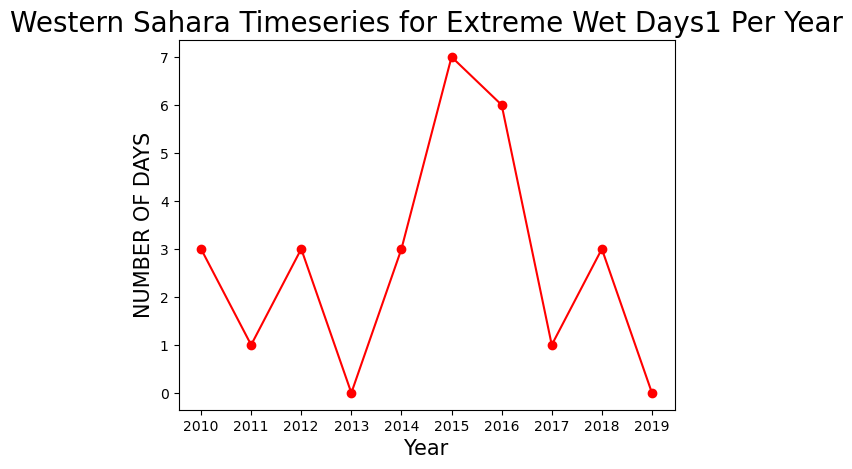

In [185]:
plt.plot(year, extreme_wet_days1_per_year, marker ='o',color = 'r')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('NUMBER OF DAYS', fontsize = 15)
plt.title('Western Sahara Timeseries for Extreme Wet Days1 Per Year', fontsize = 20);
plt.savefig('17.png')
plt.show()

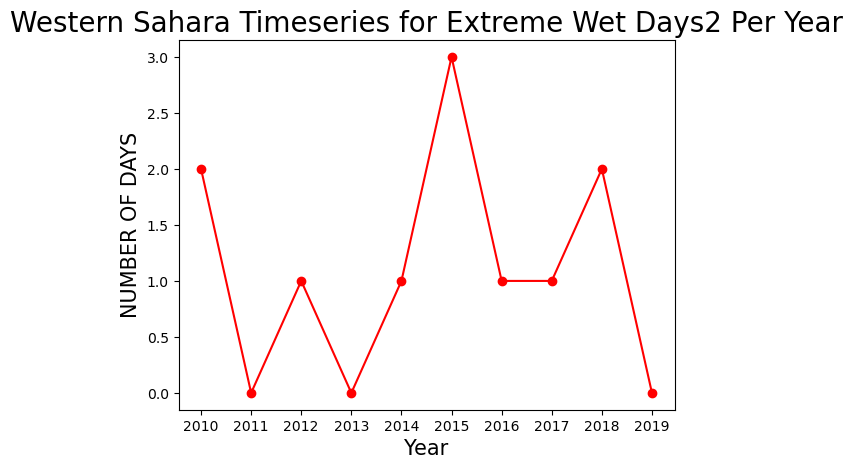

In [186]:
plt.plot(year, extreme_wet_days2_per_year, marker ='o',color = 'r')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('NUMBER OF DAYS', fontsize = 15)
plt.title('Western Sahara Timeseries for Extreme Wet Days2 Per Year', fontsize = 20);
plt.savefig('18.png')
plt.show()